# maxilab: Ασκήσεις εξάσκησης - Αριθμητική Python και Προεπεξεργασία δεδομένων

## 1. Οι θερμοκρασίες στο Μόναχο

Σε αυτή την άσκηση θα δουλέψετε με ένα σύνολο δεδομένων που περιέχει τη μέση θερμοκρασία στη πόλη του Μονάχου. Οι μετρήσεις έγιναν επί καθημερινής βάσης και αφορούν την χρόνική περίοδο 1995-2013. Το αρχείο αποτελείται από δύο στήλες. Οι δύο αυτές στήλες στο αρχείο έχουν το ακόλουθο νόημα:

- Κάποια ημερομηνία. Το δεκαδικό μέρος του αριθμού μας δίνει τη μέρα του έτους. Για παράδειγμα, η 1η Ιανουαρίου δίνεται ώς 1/365 = 0.00274. Τα δίσεκτα έτη μπορούν να αγνοηθούν.

- Τη μέση θερμοκρασία της συγκεκριμένης ημέρας στη πόλη του Μονάχου (Γερμανία).

**Ζητούμενα**

1. Διαβάστε τα δεδομένα χρησιμοποιώντας τη βιβλιοθήκη ``pandas``. Το αρχείο περιλαμβάνει μη-έγκυρες τιμές τις οποίες μπορείτε να εντοπίσετε χρησιμοποιώντας τις μεθόδους ``info`` και ``describe`` που παρέχονται από τη βιβλιοθήκη ``pandas``. Φιλτράρετε τα δεδομένα (masking) ώστε να ξεφορτωθείτε τις μη-έγκυρες τιμές.


2. Φτιάξτε ένα διάγραμμα διασποράς (scatter plot) της θερμοκρασίας ως συνάρτηση του χρόνου. Για το διάγραμμα μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη ``matplotlib.pyplot.scatter``.


3. Φτιάξτε ένα διάγραμμα διασποράς της θερμοκρασίας ως συνάρτηση του **δεκαδικού μέρους** της ημερομηνίας. Μπορείτε να χρησιμοποιήσετε τον τελεστή ``%`` (modulo) για να βρείτε το δεκαδικό μέρος των ημερομηνιών (δες και το παρακάτω κελί).


4. Υπολογίστε τις παρακάτω θερμοκρασίες:

    - Τη μέση θερμοκρασία για όλα τα χρόνια και όλους τους μήνες (σύνολο των δεδομένων).
    
    - Τη μέση θερμοκρασία για την περίοδο Ιανουάριο εώς και Μάρτιο. Μπορείτε να υποθέσετε ότι αυτή η περίοδος είναι το ένα τέταρτο ενός έτους χωρίς να σας απασχολούν τα δίσεκτα έτη.
    
    - Τη μέγιστη, ελάχιστη και μέση θερμοκρασία για κάθε έτος από το 1995 μέχρι και το 2012 (το έτος 2013 δεν καλύπτεται πλήρως από τις μετρήσεις). Μπορείτε να χρησιμοποιήσετε έναν βρόγχο επανάληψης ``for`` για αυτό το ερώτημα.

In [1]:
# This cell reminds you on the '%'-operator to isolate the fractional
# part of float numbers.
# This should be very useful for task 3 above
import numpy.random as nr

# ten random numbers between 0 and 10
a = nr.random(10) * 10
print(a)
# isolate the fractional parts of the numbers
b = a % 1
print(b)

[7.74396846 7.02778101 7.37246699 3.24999928 7.39004097 0.0210379
 1.46910384 2.37262693 2.87234679 3.24352767]
[0.74396846 0.02778101 0.37246699 0.24999928 0.39004097 0.0210379
 0.46910384 0.37262693 0.87234679 0.24352767]


---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Αρχικά, αποθηκεύουμε τα δεδομένα μας σε ένα ``DataFrame`` χρησιμοποιώντας ως οριοθέτη (delimiter) τον κενό χαρακτήρα. Επίσης, επειδή το σύνολο δεδομένων μας δεν περιέχει κάποια επικεφαλίδα (header) που να περιγράφει το είδος των δεδομένων που περιέχει κάθε στήλη, δίνουμε δικά μας ονόματα.

In [3]:
data = pd.read_csv('../data/munich_temperatures_average_with_bad_data.txt', delimiter=' ', names=['date', 'temperature'])
data

,date,temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


Χρησιμοποιώντας την μέθοδο ``info`` της βιβλιοθήκης ``pandas`` παρατηρούμε ότι το σύνολο δεδομένων μας είναι πλήρες (δεν περιέχει κενές τιμές) και αποτελείται από αριθμητικές τιμές.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6679 entries, 0 to 6678
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6679 non-null   float64
 1   temperature  6679 non-null   float64
dtypes: float64(2)
memory usage: 104.5 KB


Χρησιμοποιώντας την μέθοδο ``describe`` της βιβλιοθήκης ``pandas`` παίρνουμε μία στατιστική περιγραφή των δεδομένων μας. Παρατηρούμε ότι η ελάχιστη και η μέγιστη τιμή θερμοκρασιών είναι -99 και 99 βαθμούς Κελσίου αντίστοιχα. Προφανώς αυτές οι μετρήσεις δεν αντιστοιχούν σε κάποια λογική μέση θερμοκρασία και αποτελούν έκτοπες τιμές. Αυτό το επιβεβαιώνουμε και με το γράφημα των θερμοκρασιών σε συνάρτηση με τον χρόνο.

In [5]:
data.describe()

,date,temperature
count,6679.000000,6679.000000
mean,2004.143930,8.941907
std,5.279192,12.283620
min,1995.002740,-99.000000
25%,1999.573580,2.666670
50%,2004.145110,9.388890
75%,2008.715950,15.500000
max,2013.284740,99.000000


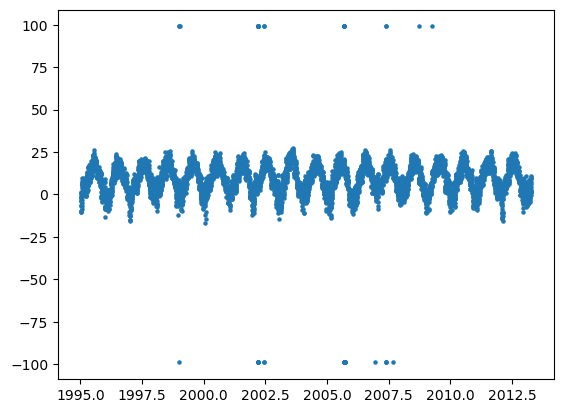

In [6]:
_ = plt.scatter(data['date'], data['temperature'], s=5)

Θα φιλτράρουμε το σύνολο των δεδομένων μας κρατώντας μόνο εκείνα τα οποία αντιστοιχούν σε ένα λογικό εύρος θερμοκρασιών. Ας υποθέσουμε ότι αυτό το εύρος κυμαίνεται μεταξύ -50 και 50 βαθμών Κελσίου.

Κάνοντας ξανά το γράφημα της μεταβολής της μέσης θερμοκρασίας με τον χρόνο βλέπουμε ότι η κατάσταση έχει βελτιωθεί σημαντικά με την διακύμανση στη θερμοκρασία να είναι πολύ πιο φανερή αφού έχουμε διώξει τις έκτοπες τιμές.

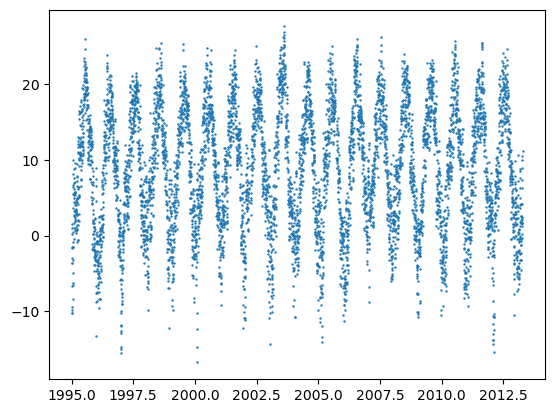

In [7]:
mask_low_temp = data.iloc[:,1] > -50
mask_high_temp = data.iloc[:,1] < 50


_ = plt.scatter(data['date'][mask_low_temp & mask_high_temp], 
                data['temperature'][mask_low_temp & mask_high_temp], 
                s=0.5)

Κρατώντας μόνο το δεκαδικό μέρος της ημερομηνίας, ουσιαστικά έχουμε τη μεταβολή της θερμοκρασίας ανά μήνα.

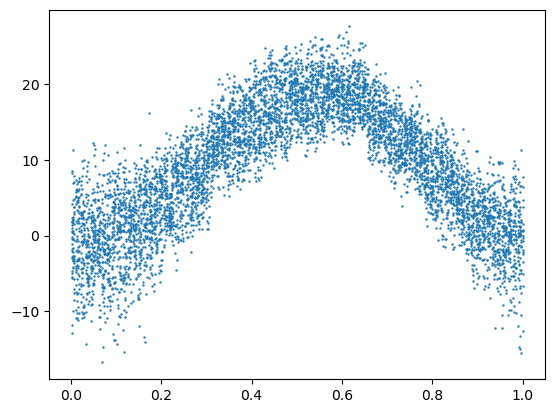

In [8]:
# Keep the decimal part of the date (months)
frac_date = data['date'][mask_low_temp & mask_high_temp] % 1

# Keep the integer part of the date (year)
years = data.date // 1

temperatures = data['temperature'][mask_low_temp & mask_high_temp]


_ = plt.scatter(frac_date, temperatures, s=0.5)

In [9]:
print("Mean temperature of all years and months: {} degrees Celsius".format(round(np.mean(temperatures), 2)))

Mean temperature of all years and months: 8.93 degrees Celsius


Οι μήνες Ιανουάριος εώς και Μάρτιο αποτελούν το πρώτο τρίμηνο και είναι συνολικά το 1/4 του έτους. Έτσι μπορούμε να φιλτράρουμε τα δεδομένα μας ως:

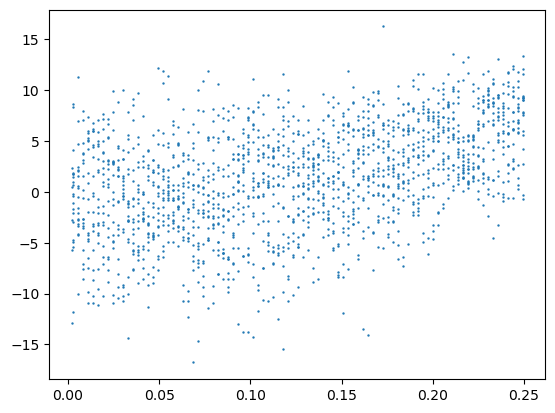

In [10]:
first_trimester_mask = frac_date <= 0.25

_ = plt.scatter(frac_date[first_trimester_mask], temperatures[first_trimester_mask], s=0.5)

In [11]:
print('Mean temperature of the months January to March: {} degrees Celsius'.format(round(np.mean(temperatures[first_trimester_mask]),2)))

Mean temperature of the months January to March: 1.42 degrees Celsius


Για να κρατήσουμε τις ημερομηνίες που μας ενδιαφέρουν θα χρησιμοποιήσουμε την μέθοδο ``unique`` της βιβλιοθήκης ``pandas``. Στη συνέχεια, θα βρούμε την μέγιστη/ελάχιστη/μέση θερμοκρασία για κάθε έτος και θα τις αποθηκεύσουμε σε μία πλειάδα που θα περιέχει και το έτος για το οποίο κάναμε την ανάλυση. Το σύνολο αυτών των πλειάδων (μία για κάθε έτος) θα το αποθηκεύσουμε σε μία λίστα για περαιτέρων χρήση.

In [12]:
# Check only the years 1995 to 2012
years_to_check = np.delete(years.unique(), -1)

# Keep the temperatures and the year in a tuple
# First element of the tuple will be the year
# Second element of the tuple will be a list with the 
# corresponding temperatures
results = []

for year in years_to_check:
    mask = (years == year)
    
    max_temp = temperatures[mask].max()
    min_temp = temperatures[mask].min()
    mean_temp = temperatures[mask].mean()
    
    results.append(tuple([year, max_temp, min_temp, mean_temp]))

In [13]:
message = """
Year : {}
----
Max temperature: {} degrees Celsius
Min temperature: {} degrees Celsius
Average temperature: {} degrees Celsius
**********************************************************
"""

for element in results:
    
    # Unpack the tuple
    year, max_temp, min_temp, mean_temp = element
        

    
    print(message.format(int(year), 
                         round(max_temp, 2), 
                         round(min_temp, 2), 
                         round(mean_temp, 2)
                        )
         )


Year : 1995
----
Max temperature: 25.94 degrees Celsius
Min temperature: -13.28 degrees Celsius
Average temperature: 8.77 degrees Celsius
**********************************************************


Year : 1996
----
Max temperature: 23.83 degrees Celsius
Min temperature: -15.5 degrees Celsius
Average temperature: 7.23 degrees Celsius
**********************************************************


Year : 1997
----
Max temperature: 21.56 degrees Celsius
Min temperature: -12.89 degrees Celsius
Average temperature: 8.55 degrees Celsius
**********************************************************


Year : 1998
----
Max temperature: 25.5 degrees Celsius
Min temperature: -12.22 degrees Celsius
Average temperature: 9.25 degrees Celsius
**********************************************************


Year : 1999
----
Max temperature: 25.33 degrees Celsius
Min temperature: -9.83 degrees Celsius
Average temperature: 9.11 degrees Celsius
**********************************************************


Year : 

## 2. Αριθμητική ολοκλήρωση

Θέλουμε να υπολογίσουμε **αριθμητικά** τα παρακάτω ολοκληρώματα:

- $\displaystyle \int_{0}^{\pi} \sin(x)dx = 2$



- $\displaystyle \int_{-1}^{2} x^3 dx = \frac{15}{4}$



Θα πραγματοποιήσουμε την εκτίμησή μας με τον ευκολότερο δυνατό τρόπο, με τα αθροίσματα κατά Riemann: 

Έστω $f(x)$ μία συνεχής συνάρτηση στο διάστημα $I = [a, b]$. Έστω $x_i$ με $a < x_0 < \dots < x_n < b$ ένα τμήμα του διαστήματος $I$. Αν $\Delta x_i = x_{i+1} - x_i$  με $i \in [0, n-1] $ και $f_{\Delta_i} = f\left(\displaystyle \frac{x_{i} + x_{i+1}}{2} \right)$, το ολοκλήρωμα μπορεί να προσεγγιστεί ως:


$$\displaystyle \int_{a}^{b} f(x) dx \approx \sum_{i=0}^{n-1} \Delta x_i \cdot f_{\Delta_i} = I_{\rm approx}(n)$$


Δείτε τα παρακάτω διαγράμματα ώστε να οπτικοποιήσετε τα αποτελέσματα της μεθόδου. Μπορείτε να διαβάσετε περισσότερα για τα αθροίσματα Riemann στη [Wikipedia](https://en.wikipedia.org/wiki/Riemann_sum).

<div>
    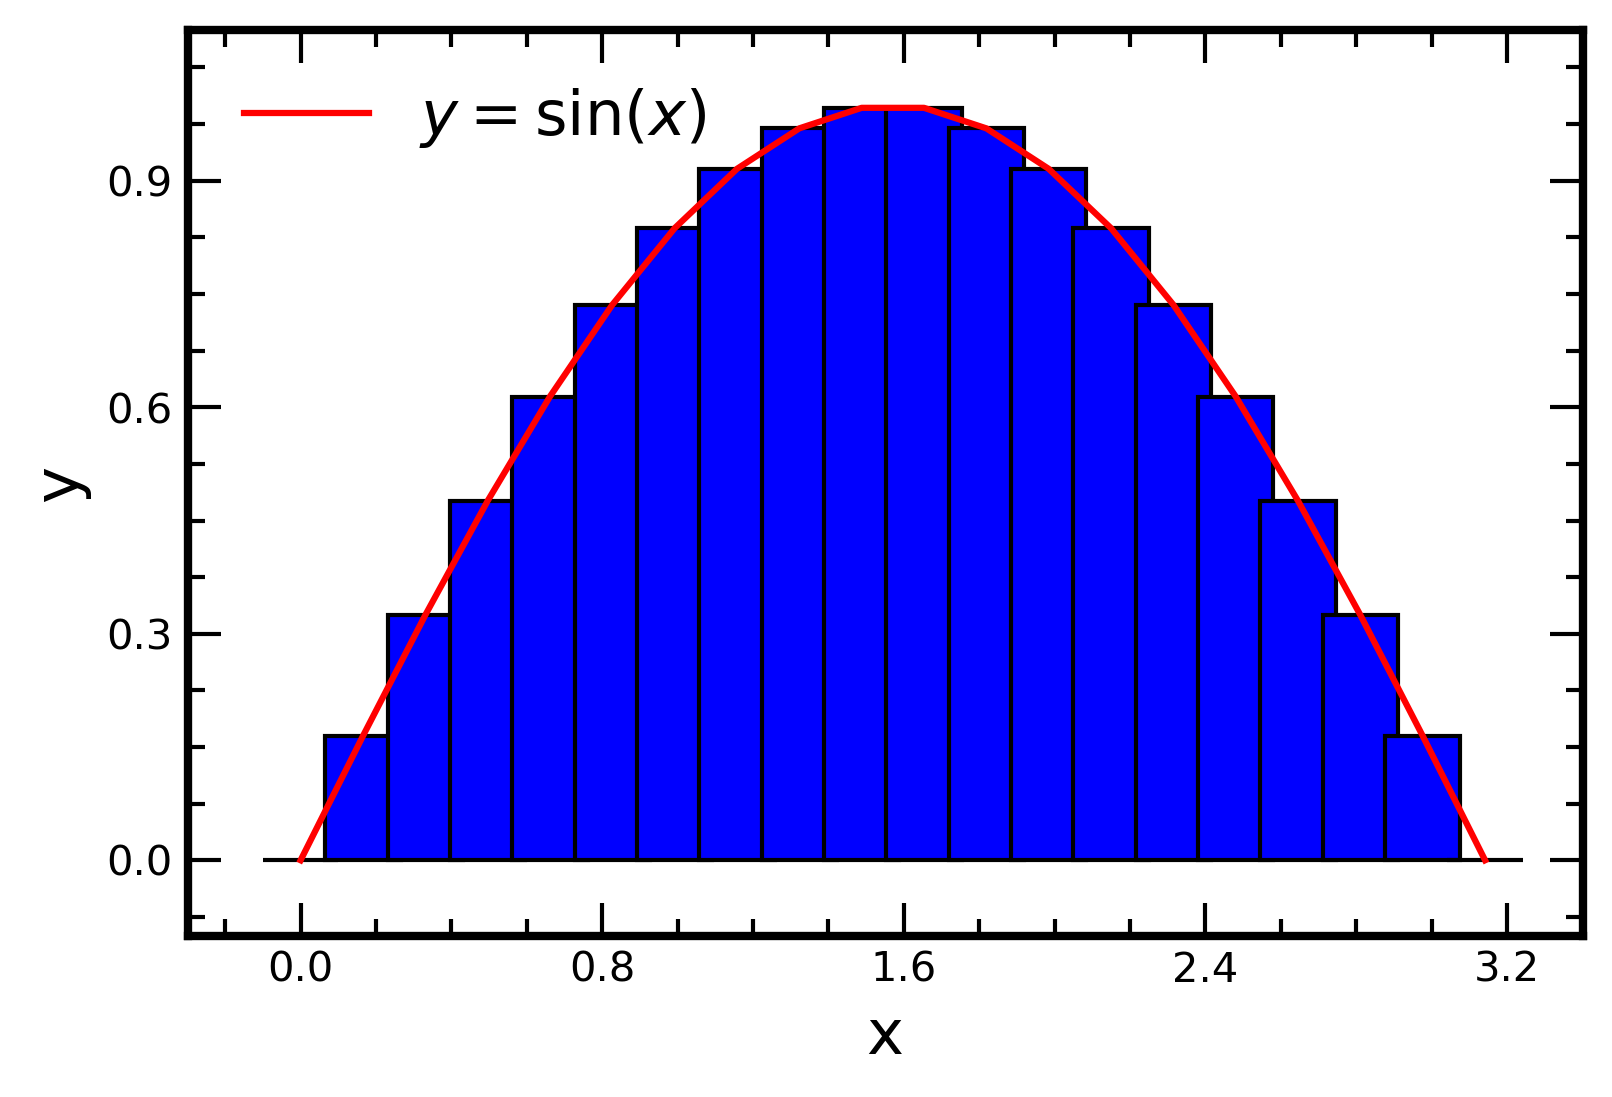
</div>

<div>
    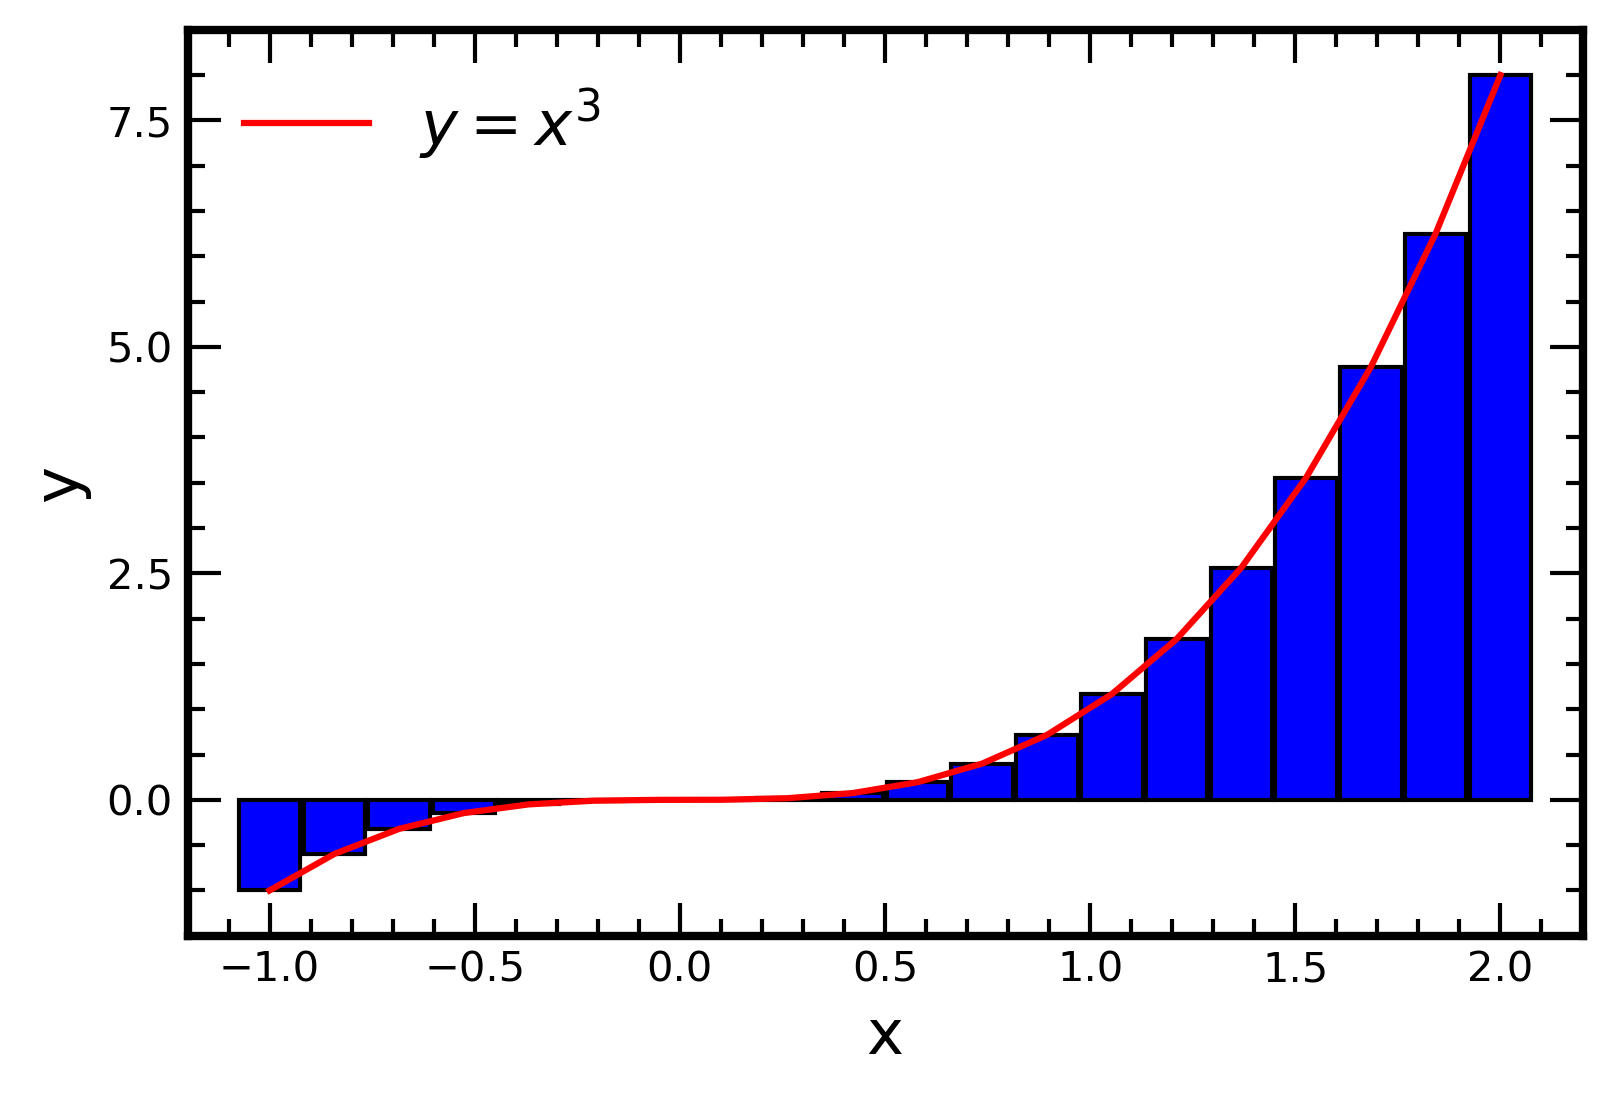
</div>

---

### 2.1 Εφαρμογή της ολοκλήρωσης κατά Riemann

Κατασκευάστε numpy arrays με τα $x_i$ και τις αντίστοιχες τιμές της συνάρτησης. Βάσει αυτών υπολογίστε τα $\Delta x_i$ και $f_{\Delta_i}$ καθώς και το άθροισμα Riemann.


Μπορούμε σχετικά εύκολα να υλοποιήσουμε ένα άθροισμα κατά Riemann όπως φαίνεται στην παρακάτω συνάρτηση (dummy_riemann_integral)

In [14]:
def dummy_riemann_integral(x, function):
    '''
        ARGS
        =======
            - x        : array-like; data to feed the function (see below).
            - function : the function to be integrated.
    
        RETURNS
        =======
            - The Riemann sum 
    '''
    
    # a list to keep the elements of 
    # riemann integration
    approx_res = []
    
    for i in range(0, len(x)-1):
    
        delta_x = x[i+1] - x[i]

        fn_arg = (x[i] + x[i+1]) / 2.

        approx_res.append(delta_x * function(fn_arg))

    return sum(approx_res)

Παρ΄όλο που η παραπάνω συνάρτηση καταφέρνει και υπολογίζει το ζητούμενο άθροισμα, η χρήση βρόγχου επανάληψης της καθιστά εν δυνάμει μη-αποδοτική. Μία καλύτερη προσέγγιση είναι να χρησιμοποιήσουμε τη διανυσματικοποίηση που μας προσφέρει η βιβλιοθήκη ``NumPy`` ώστε να γράψουμε πολύ πιο αποδοτικές ρουτίνες. 

In [15]:
def riemann_integral(x, function):
    '''
    Calculate the Riemann integral using vectorized operations.

    ARGS
    ======
        - x (array-like)      : Data to feed the function.
        - function (callable) : The function to be integrated.

    RETURNS
    =======
        - float: The Riemann integral.
    '''
    # We use np.diff(x) to calculate the differences between adjacent elements in the x array. 
    # This computes delta_x for each subinterval.
    delta_x = np.diff(x)
    
    # We calculate fn_arg using NumPy to represent the midpoints of the subintervals efficiently.
    fn_arg = (x[:-1] + x[1:]) / 2
    
    # We use vectorized operations to compute the product of delta_x and function(fn_arg) for each subinterval, 
    # resulting in an array of partial areas.
    approx_res = delta_x * function(fn_arg)
    
    return np.sum(approx_res)


In [16]:
n = 20
x1 = np.linspace(-1, 2, n)
x2 = np.linspace(0, np.pi, n)

y1 = riemann_integral(x1, function=lambda x: x**3)
y2 = riemann_integral(x2, function=lambda x: np.sin(x))

print('Riemann sum: {}, epsilon value: {}'.format(y1, np.abs(y1 - (15./4.))))
print('Riemann sum: {}, epsilon value: {}'.format(y2, np.abs(y2 - 2.0)))

Riemann sum: 3.740650969529086, epsilon value: 0.009349030470914066
Riemann sum: 2.0022801200729097, epsilon value: 0.002280120072909675


In [17]:
# We get the same result using the non-vectorized function 
y1_dummy = dummy_riemann_integral(x1, function=lambda x: x**3)
y2_dummy = dummy_riemann_integral(x2, function=lambda x: np.sin(x))

print('Riemann sum: {}, epsilon value: {}'.format(y1_dummy, np.abs(y1_dummy - (15./4.))))
print('Riemann sum: {}, epsilon value: {}'.format(y2_dummy, np.abs(y2_dummy - 2.0)))

Riemann sum: 3.740650969529086, epsilon value: 0.009349030470914066
Riemann sum: 2.0022801200729097, epsilon value: 0.002280120072909675


---

### 2.2 Ακρίβεια της εκτίμησης

Προφανώς, η ακρίβεια των αριθμητικών εκτιμήσεων εξαρτάται από τη διάτμηση του διαστήματος $I = [a,b]$ και ιδιαίτερα από την επιλογή του $n$. Μπορεί κανείς να δείξει ότι το απόλυτο λάθος, $\epsilon_{\rm abs}(n)$, της προσέγγισης του ολοκληρώματος με τα αθροίσματα Riemann έχει τη συμπεριφορά:

$$\epsilon_{\rm abs}(n) = \left| I_{\rm approx}(n) - \displaystyle \int_{a}^{b} f(x)dx \right| \propto n^\kappa$$


Πραγματοποιήστε πειράματα για να εκτιμήσετε την τιμή του $\kappa$. 

**ΠΡΟΣΟΧΗ:** Το ερώτημα είναι επίτηδες διατυπωμένο με αόριστο τρόπο. Το να σκεφτείτε κάποιο λογικό τρόπο εξέτασης των αποτελεσμάτων είναι μέρος της άσκησης.

In [18]:
"""
The following code is a set up for numerical experimentation and analysis of the convergence behavior
of Riemann sums for different functions and intervals. 
It's designed to investigate how the error decreases as the number of subintervals increases, 
which can provide insights into the accuracy of the Riemann sum approximation for various functions.

It involves calculating Riemann sums, comparing them to known true values, computing the error, and examining 
the convergence rate with respect to the number of intervals n.

Because we are setting intervals of different lengths, it is possible to experience broadcasting issues
with our riemann_integral function. We will try to address this problem using the np.vectorize method on our
function.

It is possible that using np.vectorize() on the riemann_integral function will not directly resolve the 
broadcasting issue we might encounter. The np.vectorize() method is a convenient way to apply a function 
element-wise to arrays, but it doesn't inherently address the difference in lengths of the arrays you're 
operating on.

What np.vectorize() does is apply the specified function to each element of the input arrays, 
but it does not automatically handle broadcasting or ensure that arrays of different shapes 
can be operated on together. Instead, it applies the function separately to each element of 
the input arrays.

The safe thing to do in order to address the broadcasting issue, you need to ensure that the arrays involved 
in your calculations have compatible shapes, such as the same length.
"""

v_riemann_integral = np.vectorize(riemann_integral)

# The upper limit for each x-interval
n_range = np.arange(50, 250, 5)

# The x-intervals. Each interval corresponds to a different n
x1_values = np.asarray([np.linspace(-1, 2, i) for i in n_range], dtype='object')
x2_values = np.asarray([np.linspace(0., np.pi, i) for i in n_range], dtype='object')


# The calculated y-values (Riemann sum) for each x-interval 
y1 = v_riemann_integral(x1_values, function=lambda x: x**3)
y2 = v_riemann_integral(x2_values, function=lambda x: np.sin(x))

# The true y-values
y1_true = np.ones_like(y1) * (15./4.)
y2_true = np.ones_like(y2) * 2.0

# The epsilon error
eps1 = np.abs(y1 - y1_true)
eps2 = np.abs(y2 - y2_true)

# The kappa exponent in: eps \approx n^{\alpha}
exp1 = np.log10(eps1) / np.log10(n_range)
exp2 = np.log10(eps2) / np.log10(n_range)

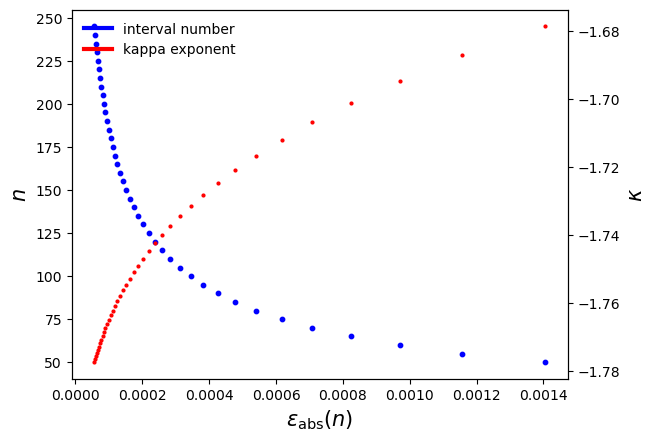

In [19]:
from matplotlib.pyplot import Line2D


# Since we are working with 2 different axes
# we will create a custom legend to describe both 
legend_elements = [Line2D([0], [0], color='b', lw=3, label='interval number'),
                  Line2D([0], [0], color='r', lw=3, label='kappa exponent')
                 ]                 

# This is an object-oriented approach for plotting 
# with matplotlib
fig, ax1 = plt.subplots()

# Duplicate y-axis (x-axis is the same)
ax2 = ax1.twinx()

# Set x/y labels for all axes
ax1.set_xlabel(r'$\epsilon_{\rm abs} (n)$', size=15)
ax1.set_ylabel(r'$n$', size=15)
ax2.set_ylabel(r'$\kappa$', size=15)

_ = ax1.scatter(eps1, n_range, c='b', s=10)
_ = ax2.scatter(eps1, exp1, c='r', s=4)

_ = plt.legend(handles=legend_elements, loc='best', frameon=False)

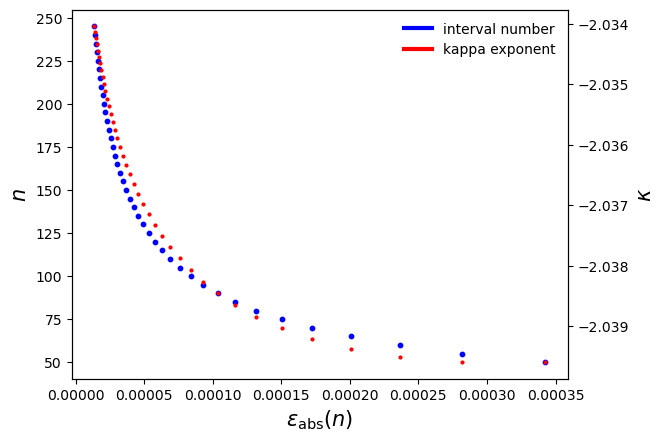

In [20]:
legend_elements = [Line2D([0], [0], color='b', lw=3, label='interval number'),
                  Line2D([0], [0], color='r', lw=3, label='kappa exponent')
                 ]                 

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_xlabel(r'$\epsilon_{\rm abs} (n)$', size=15)
ax1.set_ylabel(r'$n$', size=15)
ax2.set_ylabel(r'$\kappa$', size=15)

_ = ax1.scatter(eps2, n_range, c='b', s=10)
_ = ax2.scatter(eps2, exp2, c='r', s=4)

_ = plt.legend(handles=legend_elements, loc='best', frameon=False)

In [21]:
# Find the mean value for the exponent when epsilon is sufficiently small
print('Kappa exponent for polynomial function: {}'.format(exp1[np.where(eps1 < 1e-4)].mean()
                                                         )
     )

# print(np.mean(exp1))

print('Kappa exponent for sinusoidal function: {}'.format(exp2[np.where(eps2 < 1e-4)].mean()
                                                         )
     )

# print(np.mean(exp2))

Kappa exponent for polynomial function: -1.7715351573568834
Kappa exponent for sinusoidal function: -2.0358986169046136
